```{contents}
```

# Cost Function

AdaBoost doesn’t use Mean Squared Error (MSE) or cross-entropy directly. Instead, it optimizes an **exponential loss function**, which is tightly linked to how weights and classifier contributions are updated.

---

## **1. Exponential Loss as the Cost Function**

For binary classification, let:

* True labels: $y_i \in \{-1, +1\}$
* Strong classifier output:

  $$
  f(x) = \sum_{t=1}^T \alpha_t h_t(x)
  $$

  where $h_t(x)$ is the weak learner’s prediction and $\alpha_t$ is its weight.

The **AdaBoost loss function** is:

$$
L = \sum_{i=1}^n \exp(-y_i f(x_i))
$$

---

### 🔍 Intuition:

* If $y_i f(x_i)$ is **positive and large** → prediction is correct with high confidence → loss is small ($e^{-\text{large}}$).
* If $y_i f(x_i)$ is **negative** → misclassified → loss grows exponentially.

👉 This makes AdaBoost **very sensitive to misclassified points** (and outliers).

---

## **2. Weighted Error Minimization**

At each iteration, AdaBoost minimizes a **weighted classification error**:

$$
\epsilon_t = \frac{\sum_{i=1}^n w_i \cdot \mathbf{1}(h_t(x_i) \neq y_i)}{\sum_{i=1}^n w_i}
$$

This connects to the exponential loss because updating weights:

$$
w_i^{(t+1)} = w_i^{(t)} \cdot e^{-\alpha_t y_i h_t(x_i)}
$$

is exactly the gradient-descent step for minimizing exponential loss.

---

## **3. Cost Function in Terms of Margins**

The *margin* for a point is:

$$
\text{margin}(x_i) = y_i f(x_i)
$$

* Large positive margin → correct and confident classification.
* Negative margin → misclassification.

AdaBoost **implicitly maximizes the margin** by minimizing exponential loss.
This is why its decision boundary often looks similar to an SVM boundary.

---

**Summary**

* **AdaBoost cost function** = **Exponential Loss**:

  $$
  L = \sum_{i=1}^n e^{-y_i f(x_i)}
  $$
* Misclassified points incur **huge penalties**, so the algorithm shifts focus toward them.
* The cost function ties directly to:

  * **Learner weights** ($\alpha_t = \tfrac{1}{2} \ln\frac{1-\epsilon_t}{\epsilon_t}$)
  * **Sample weight updates** (increase weight of misclassified points).
* Geometric interpretation: AdaBoost minimizes exponential loss ≈ maximizes the **margin**.



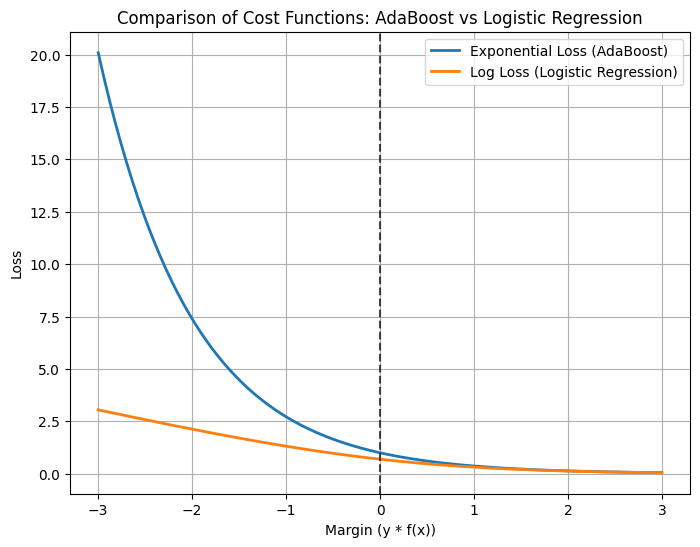

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Generate binary classification dataset
X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, class_sep=1.2, random_state=42
)

# Train AdaBoost
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50, random_state=42
)
ada.fit(X, y)

# Train Logistic Regression (for comparison with log loss)
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Compute margins (y*f(x)) for AdaBoost
f_scores = np.sum([estimator.predict(X) * alpha 
                   for estimator, alpha in zip(ada.estimators_, ada.estimator_weights_)], axis=0)
margins = y * f_scores

# Exponential loss for AdaBoost
exp_loss = np.exp(-margins)

# Logistic loss for comparison
logits = log_reg.decision_function(X)
log_loss = np.log(1 + np.exp(-y * logits))

# Plot losses vs margins
m = np.linspace(-3, 3, 200)
exp_curve = np.exp(-m)
log_curve = np.log(1 + np.exp(-m))

plt.figure(figsize=(8,6))
plt.plot(m, exp_curve, label="Exponential Loss (AdaBoost)", linewidth=2)
plt.plot(m, log_curve, label="Log Loss (Logistic Regression)", linewidth=2)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.7)
plt.xlabel("Margin (y * f(x))")
plt.ylabel("Loss")
plt.title("Comparison of Cost Functions: AdaBoost vs Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()
